## Multiple linear regression & Polynomial regression

In [117]:
import pandas as pd

donat = {
    'diameter': [6, 8, 10, 14, 18],
    'n_toping': [2, 1, 0 , 2, 0],
    'harga': [7, 9, 13, 17.5, 18]
}

train_donat_df = pd.DataFrame(donat)
train_donat_df

,diameter,n_toping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


In [118]:
donat = {
    'diameter': [8, 9, 11, 16, 12],
    'n_toping': [2, 0, 2 , 2, 0],
    'harga': [11, 8.5, 15, 18, 11]
}

test_donat_df = pd.DataFrame(donat)
test_donat_df

,diameter,n_toping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


In [121]:
# Prepocessing dataset

import numpy as np

X_train = np.array(train_donat_df[['diameter','n_toping']])
y_train = np.array(train_donat_df['harga'])

print(f'X_train:\n{X_train}')
print(f'y_train: {y_train}')

X_train:
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]
y_train: [ 7.   9.  13.  17.5 18. ]


In [122]:
X_test = np.array(test_donat_df[['diameter','n_toping']])
y_test = np.array(test_donat_df['harga'])

print(f'X_train:\n{X_test}')
print(f'y_train: {y_test}')

X_train:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]
y_train: [11.   8.5 15.  18.  11. ]


In [125]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.7701677731318468


## Polynomial Regression

In [141]:
# Preprocessing

X_train = np.array(train_donat_df['diameter']).reshape(-1,1)
y_train = np.array(train_donat_df['harga'])

print(f'X_train:\n{X_train}')
print(f'y_train: {y_train}')

X_train:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]
y_train: [ 7.   9.  13.  17.5 18. ]


In [142]:
# Polynomial features
# Quadratic: y = alpha +beta*x+beta*x**2
# Cubic: y = alpha +beta*x+beta*x**2+beta*x**3

from sklearn.preprocessing import PolynomialFeatures

quadratic_features = PolynomialFeatures(degree = 2)
X_train_quadratic = quadratic_features.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}')

X_train_quadratic:
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]


In [143]:
# Training model

model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

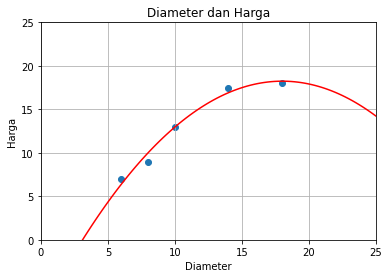

In [145]:
# Visualization 

import matplotlib.pyplot as plt

X_vis = np.linspace(0,25,100).reshape(-1,1)
X_vis_quadratic = quadratic_features.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, 'r-')
plt.title('Diameter dan Harga')
plt.xlabel('Diameter')
plt.ylabel('Harga')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

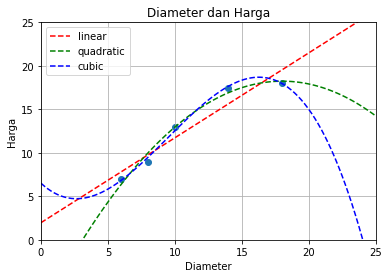

In [151]:
# Cubic
plt.scatter(X_train, y_train)

# Linear Model
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0,25,100).reshape(-1,1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, 'r--', label = 'linear')

# Quadratic 
quadratic_features = PolynomialFeatures(degree = 2)
X_train_quadratic = quadratic_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_features.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis_quadratic, 'g--', label = 'quadratic')

# Cubic
cubic_features = PolynomialFeatures(degree = 3)
X_train_cubic = cubic_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_features.transform(X_vis)
y_vis_cubic = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis_cubic, 'b--', label = 'cubic')

plt.title('Diameter dan Harga')
plt.xlabel('Diameter')
plt.ylabel('Harga')
plt.legend()
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()